#Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
# Importing required basic libraries

import numpy as np
import pandas as pd

In [2]:
# Loading Train dataset
df_train = pd.read_csv('/content/drive/MyDrive/DataScience/Dataset/_CHALLENGES_/AnalyticsVidhya/PRACTICE/LoanPrediction/AV_train_ctrUa4K.csv')

# EDA

In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Dropping the irrelevant ID column
df_train.drop(['Loan_ID'], axis=1, inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# DATA PREPROCESSING

## These are the categorical columns which we will need to convert into numerical forms through any of the encoding techniques.

In [8]:
df_train.select_dtypes(object).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

### Let's see the values of each colummn one by one to understand the data better

In [9]:
print('Gender:', df_train.Gender.unique(), df_train.Gender.nunique())
print('Married:', df_train.Married.unique(), df_train.Married.nunique())
print('Dependents:', df_train.Dependents.unique(), df_train.Dependents.nunique())
print('Education:', df_train.Education.unique(), df_train.Education.nunique())
print('Self_Employed:', df_train.Self_Employed.unique(), df_train.Self_Employed.nunique())
print('Property_Area:', df_train.Property_Area.unique(), df_train.Property_Area.nunique())
print('Loan_Status:', df_train.Loan_Status.unique(), df_train.Loan_Status.nunique())

Gender: ['Male' 'Female' nan] 2
Married: ['No' 'Yes' nan] 2
Dependents: ['0' '1' '2' '3+' nan] 4
Education: ['Graduate' 'Not Graduate'] 2
Self_Employed: ['No' 'Yes' nan] 2
Property_Area: ['Urban' 'Rural' 'Semiurban'] 3
Loan_Status: ['Y' 'N'] 2


### As seen we can see that there are 'nan' values also, which can be missing values.

In [10]:
df_train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Now we will fill the nan values according to the columns

### *Below are the categorical columns, hence we will be replacing the missing values with the mode of the respective columns*

In [11]:
df_train.Gender = df_train.Gender.fillna(df_train.Gender.mode()[0])
df_train.Married = df_train.Married.fillna(df_train.Married.mode()[0])
df_train.Dependents = df_train.Dependents.fillna(df_train.Dependents.mode()[0])
df_train.Self_Employed = df_train.Self_Employed.fillna(df_train.Self_Employed.mode()[0])
df_train.Loan_Amount_Term = df_train.Loan_Amount_Term.fillna(df_train.Loan_Amount_Term.mode()[0])
df_train.Credit_History = df_train.Credit_History.fillna(df_train.Credit_History.mode()[0])

### *Below is the numerical column where we will be replacing the missing values with the mean of that column*

In [12]:
df_train.LoanAmount = df_train.LoanAmount.fillna(df_train.LoanAmount.mean())

### As the categorical columns are random, we can't go with LabelEncoding on it.
###We'll use OneHotEncoding
Nominal data -> data is random -> OneHotEncoding

In [13]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
# One hot encoding on categorical columns.
df_train = pd.get_dummies(df_train, columns=['Gender','Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Amount_Term'], drop_first=True)

### *Replacing Y/N with 1/0 respectively*

In [15]:
df_train.Loan_Status = df_train.Loan_Status.replace('Y', '1')
df_train.Loan_Status = df_train.Loan_Status.replace('N', '0')

### *Here datatype of Loan_Status would still be object, so we need to convert it into numerical form*

In [16]:
df_train.Loan_Status = df_train.Loan_Status.astype(int)

### Scaling the data

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df_train[cols_to_scale] = sc.fit_transform(df_train[cols_to_scale])

In [18]:
# Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

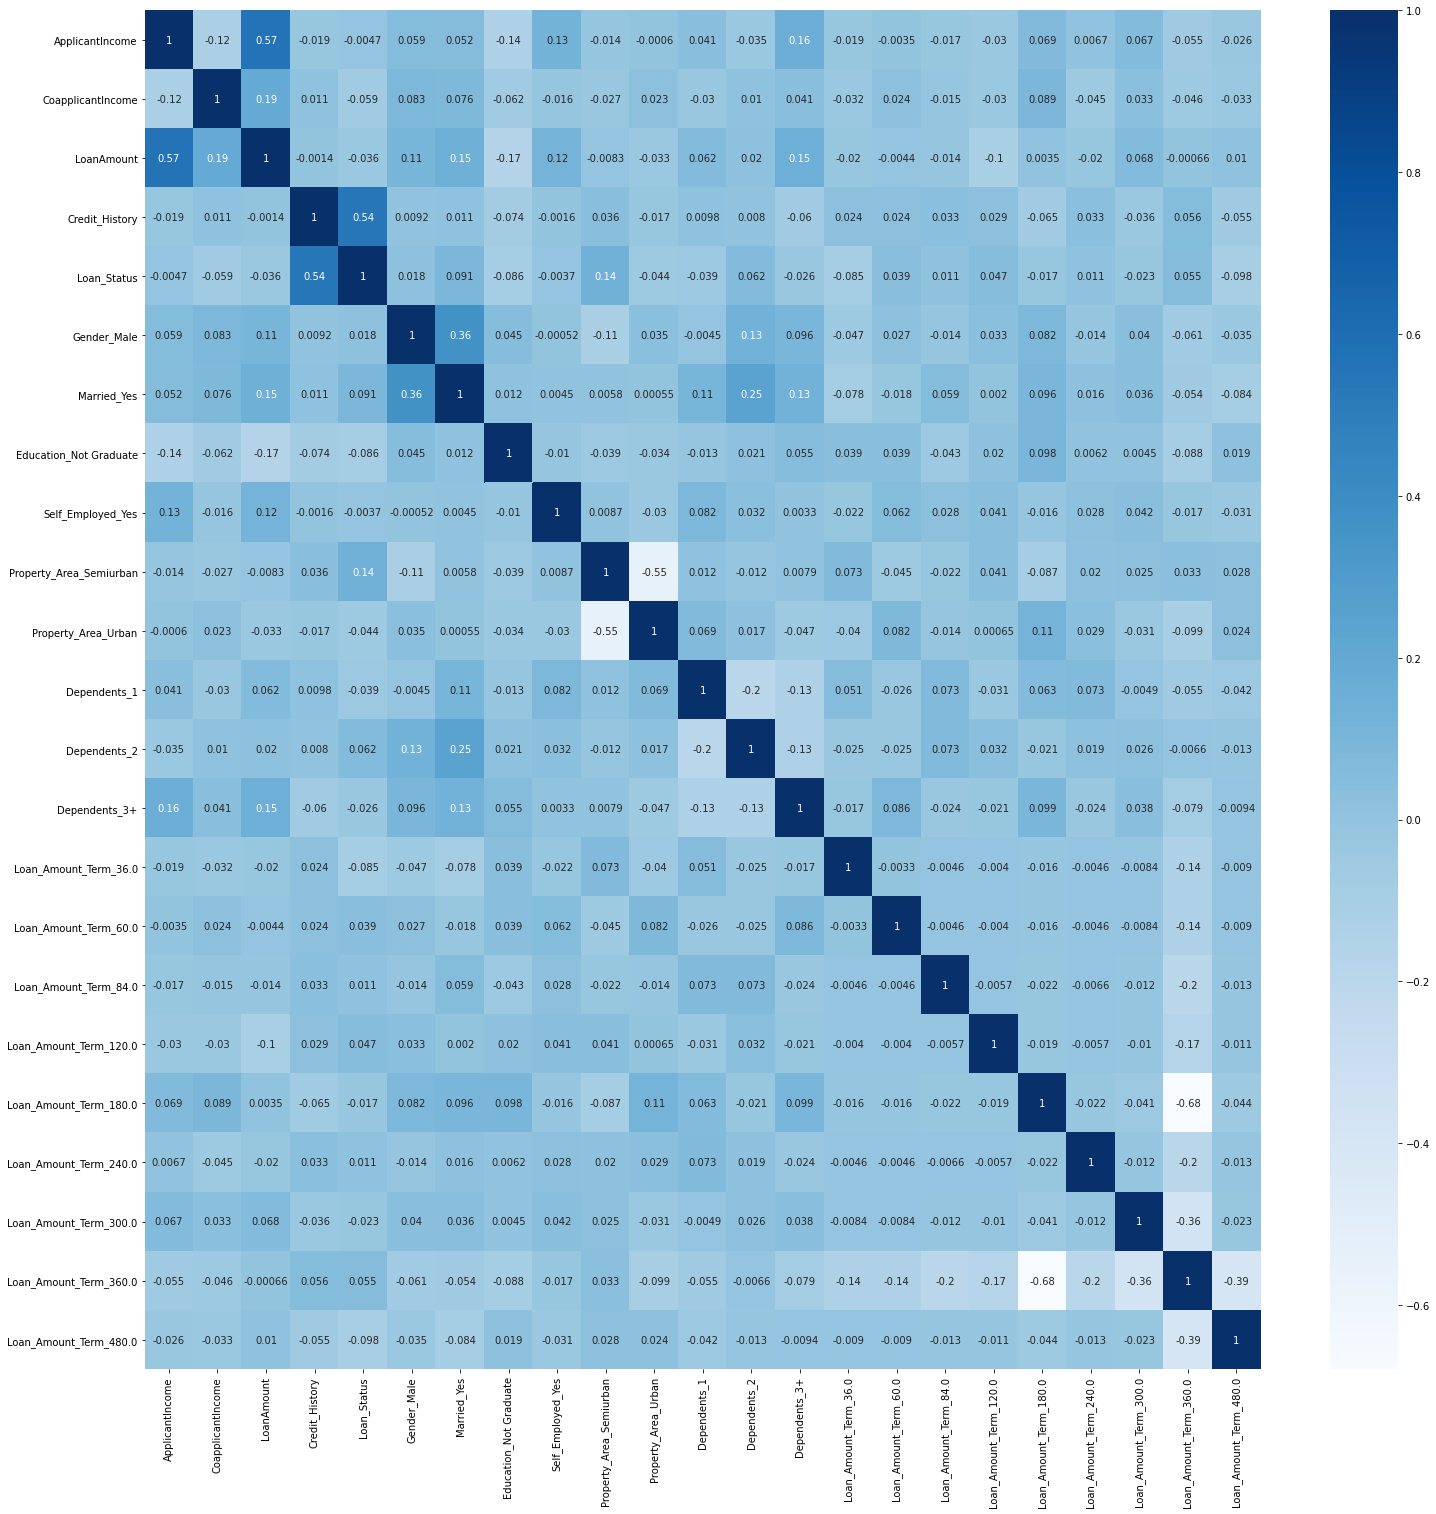

In [19]:
# Visualizing the correlation between the features

plt.figure(figsize=(25, 25))
sns.heatmap(df_train.corr(), annot=True, cmap='Blues')

# DEFINING THE VARIABLES

In [20]:
df_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Loan_Status', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Loan_Amount_Term_36.0', 'Loan_Amount_Term_60.0',
       'Loan_Amount_Term_84.0', 'Loan_Amount_Term_120.0',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_240.0',
       'Loan_Amount_Term_300.0', 'Loan_Amount_Term_360.0',
       'Loan_Amount_Term_480.0'],
      dtype='object')

In [21]:
X = df_train.drop(['Loan_Status'], axis=1)        # Independant Variable / Features
y = df_train['Loan_Status']                       # Dependant Variable / Target

## Getting important features

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [23]:
# Getting the important features
model.feature_importances_

array([0.16289129, 0.12037109, 0.17531218, 0.29220087, 0.02309593,
       0.02832983, 0.0251549 , 0.02745774, 0.01521954, 0.01641163,
       0.02241988, 0.02023955, 0.01574463, 0.0113822 , 0.00039873,
       0.0027638 , 0.0006656 , 0.0106096 , 0.00247704, 0.00361865,
       0.01362756, 0.00960775])

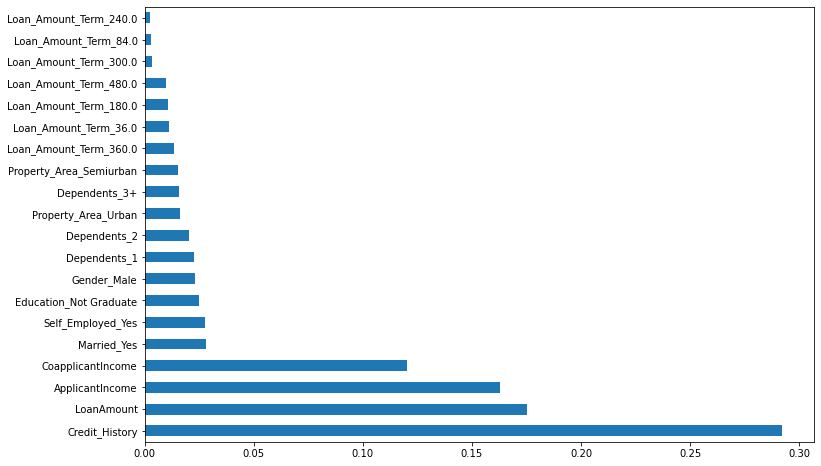

In [24]:
# Visualizing Important Features
plt.figure(figsize=(12,8))
impft = pd.Series(model.feature_importances_, index=X.columns)
impft.nlargest(20).plot(kind='barh')
plt.show()

### So we can finally say that Credit History of the person plays an important role whether he/she is eligible for loan or not. Along with that the person's income, the co-partner's income(incase of joint account) and lastly the Loan Amount is also very much important.

# **BUILDING MODEL**
---

In [25]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)      # 80% train data, 20% test data

In [26]:
# As only 'Accuracy' value will be used to judge the results, we'll import that
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [27]:
# To find best parameters
from sklearn.model_selection import GridSearchCV

# LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=42)

penalty = ['l1', 'l2', 'elasticnet', 'none']
class_weight = [None, 'balanced']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = np.arange(100, 500, 100)
multi_class = ['auto', 'ovr', 'multinomial']

log_params = dict(penalty = penalty,
                  class_weight = class_weight,
                  solver = solver,
                  max_iter = max_iter,
                  multi_class = multi_class)

### *Finding the best params*

In [29]:
mod_gs_log = GridSearchCV(estimator=log, param_grid=log_params, verbose=1, n_jobs=-1, cv=10)
mod_gs_log.fit(X_train, y_train)
bp_log = mod_gs_log.best_params_
bp_log

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 2664 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'class_weight': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'penalty': 'none',
 'solver': 'sag'}

### *Training with best parameters*

In [30]:
mod_log = LogisticRegression(class_weight=bp_log['class_weight'], max_iter=bp_log['max_iter'], multi_class=bp_log['multi_class'], 
                             penalty=bp_log['penalty'], solver=bp_log['solver'], random_state=42)

# Fitting the model
mod_log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Storing the prediction
ypred_log = mod_log.predict(X_test)

# Accuracy for this model
acc_log = accuracy_score(y_test, ypred_log)
print('Acc Log:', acc_log)

Acc Log: 0.7804878048780488


# DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = np.arange(1, 11, 2)
min_samples_split = np.arange(2, 10, 2)
min_samples_leaf = np.arange(2, 10, 2)
max_features = [None, 'auto', 'sqrt', 'log2']

dtc_params = dict(criterion = criterion,
                  splitter = splitter,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf,
                  max_features = max_features)

### *Finding the best params*

In [33]:
mod_gs_dtc = GridSearchCV(estimator = dtc, param_grid = dtc_params, cv=10, verbose = 1, n_jobs = -1)
mod_gs_dtc.fit(X_train, y_train)
bp_dtc = mod_gs_dtc.best_params_
bp_dtc

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed:   40.1s finished


{'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

### *Training with best parameters*

In [34]:
mod_dtc = DecisionTreeClassifier(max_depth=bp_dtc['max_depth'], min_samples_leaf=bp_dtc['min_samples_leaf'], criterion=bp_dtc['criterion'],
                                 max_features=bp_dtc['max_features'], min_samples_split=bp_dtc['min_samples_split'], splitter=bp_dtc['splitter'])

# Fitting the model
mod_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
# Storing the prediction
ypred_dtc = mod_dtc.predict(X_test)

# Accuracy for this model
acc_dtc = accuracy_score(y_test, ypred_dtc)
print('Acc DTC:', acc_dtc)

Acc DTC: 0.7886178861788617


# SGD CLASSIFIER

In [36]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)

loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = [1, 10, 100]
max_iter = np.arange(200, 1000, 200)

sgd_params = dict(loss = loss,
                  penalty = penalty,
                  alpha = alpha,
                  learning_rate = learning_rate, 
                  class_weight = class_weight, 
                  eta0 = eta0,
                  max_iter = max_iter)

### *Finding the best params*

In [37]:
mod_gs_sgd = GridSearchCV(estimator=sgd, param_grid=sgd_params, verbose=1, n_jobs=-1, cv=10)
mod_gs_sgd.fit(X_train, y_train)
bp_sgd = mod_gs_sgd.best_params_
bp_sgd

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 10760 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 19160 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 29960 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 43160 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 58760 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 76760 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 86400 out of 86400 | elapsed:  9.4min finished


{'alpha': 0.001,
 'class_weight': None,
 'eta0': 10,
 'learning_rate': 'invscaling',
 'loss': 'hinge',
 'max_iter': 200,
 'penalty': 'l1'}

### *Training with best parameters*

In [38]:
mod_sgd = SGDClassifier(loss=bp_sgd['loss'], penalty=bp_sgd['penalty'], max_iter=bp_sgd['max_iter'], learning_rate=bp_sgd['learning_rate'],
                        eta0=bp_sgd['eta0'], alpha=bp_sgd['alpha'])

# Fitting the model
mod_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=10, fit_intercept=True,
              l1_ratio=0.15, learning_rate='invscaling', loss='hinge',
              max_iter=200, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
# Storing the prediction
ypred_sgd = mod_sgd.predict(X_test)

# Accuracy for this model
acc_sgd = accuracy_score(y_test, ypred_sgd)
print('Acc SGD:', acc_sgd)

Acc SGD: 0.7642276422764228


# RIDGE CLASSIFIER

In [40]:
from sklearn.linear_model import RidgeClassifier

rid = RidgeClassifier(random_state=42)

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
class_weight = ['balanced', None]
max_iter = np.arange(200, 2000, 200)

rid_params = dict(alpha = alpha,
                  max_iter = max_iter,
                  class_weight = class_weight,
                  solver = solver)

### *Finding the best params*

In [41]:
mod_gs_rid = GridSearchCV(estimator = rid, param_grid = rid_params, verbose = 1, n_jobs = -1, cv=10)
mod_gs_rid.fit(X_train, y_train)
bp_rid = mod_gs_rid.best_params_
bp_rid

Fitting 10 folds for each of 1008 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 10080 out of 10080 | elapsed:  1.4min finished


{'alpha': 0.0001, 'class_weight': None, 'max_iter': 200, 'solver': 'auto'}

### *Training with best parameters*

In [42]:
mod_rid = RidgeClassifier(alpha=bp_rid['alpha'], class_weight=bp_rid['class_weight'], max_iter=bp_rid['max_iter'], solver=bp_rid['solver'])

# Fitting the model
mod_rid.fit(X_train, y_train)

RidgeClassifier(alpha=0.0001, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=200, normalize=False,
                random_state=None, solver='auto', tol=0.001)

In [43]:
# Storing the prediction
ypred_rid = mod_rid.predict(X_test)

# Accuracy for this model
acc_rid = accuracy_score(y_test, ypred_rid)
print('Acc RID:', acc_rid)

Acc RID: 0.7886178861788617


# K-NEAREST NEIGHBOR

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

n_neighbors = np.arange(1, 21, 2)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = np.arange(0, 50, 5)
metric = ['euclidean', 'manhattan', 'minkowski']

knc_params = dict(n_neighbors = n_neighbors,
                  weights = weights,
                  algorithm = algorithm,
                  leaf_size = leaf_size,
                  metric = metric)

### *Finding the best params*

In [45]:
mod_gs_knc = GridSearchCV(estimator = knc, param_grid = knc_params, verbose = 1, n_jobs = -1, cv=10)
mod_gs_knc.fit(X_train, y_train)
bp_knc = mod_gs_knc.best_params_
bp_knc

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2400 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 13756 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 24000 out of 24000 | elapsed:  1.8min finished


{'algorithm': 'auto',
 'leaf_size': 5,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'uniform'}

### *Training with best params*

In [46]:
mod_knc = KNeighborsClassifier(algorithm=bp_knc['algorithm'], leaf_size=bp_knc['leaf_size'], metric=bp_knc['metric'], n_neighbors=bp_knc['n_neighbors'],
                          weights=bp_knc['weights'])

# Fitting the model
mod_knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
# Storing the prediction
ypred_knc = mod_knc.predict(X_test)

# Accuracy for this model
acc_knc = accuracy_score(y_test, ypred_knc)
print('Acc KNC:', acc_knc)

Acc KNC: 0.7235772357723578


# RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

n_estimators = [2, 4, 8, 16, 32, 64, 100]
max_features = ['sqrt', 'log2', 'auto']
criterion = ['gini', 'entropy']
max_depth = np.arange(1, 16, 2)
min_samples_split = [0.01, 0.1, 1.0]
min_samples_leaf = [0.01, 0.1, 1.0]
class_weight = ['balanced', 'balanced_subsample']

rfc_params = dict(n_estimators = n_estimators,
                  max_features = max_features,
                  criterion = criterion,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf,
                  class_weight = class_weight)

### *Finding the best params*

In [49]:
mod_gs_rfc = GridSearchCV(estimator = rfc, param_grid = rfc_params, verbose = 1, n_jobs = -1, cv=5)
mod_gs_rfc.fit(X_train, y_train)
bp_rfc = mod_gs_rfc.best_params_
bp_rfc

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6048 candidates, totalling 30240 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 14300 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 19500 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 25500 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 30240 out of 30240 | elapsed: 18.8min finished


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'n_estimators': 32}

### *Training with best params*

In [50]:
mod_rfc = RandomForestClassifier(n_estimators=bp_rfc['n_estimators'], max_features=bp_rfc['max_features'], criterion=bp_rfc['criterion'],
                  max_depth=bp_rfc['max_depth'], min_samples_split=bp_rfc['min_samples_split'], min_samples_leaf=bp_rfc['min_samples_leaf'],
                  class_weight=bp_rfc['class_weight'])

# Fitting the model
mod_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
# Storing the prediction
ypred_rfc = mod_rfc.predict(X_test)

# Accuracy for this model
acc_rfc = accuracy_score(y_test, ypred_rfc)
print('Acc RFC:', acc_rfc)

Acc RFC: 0.7967479674796748


# ADA-BOOST CLASSIFIER

In [52]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)

algorithm = ['SAMME', 'SAMME.R']
n_estimators = [10, 50, 100, 200]
learning_rate = [10, 1, 0.1, 0.01, 0.001]

abc_params = dict(algorithm = algorithm,
                 n_estimators = n_estimators,
                 learning_rate = learning_rate)

### *Finding the best params*

In [53]:
mod_gs_abc = GridSearchCV(estimator = abc, param_grid = abc_params, verbose = 1, n_jobs = -1, cv=10)
mod_gs_abc.fit(X_train, y_train)
bp_abc = mod_gs_abc.best_params_
bp_abc

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   43.5s finished


{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}

### *Training with best params*

In [54]:
mod_abc = AdaBoostClassifier(algorithm=bp_abc['algorithm'], n_estimators=bp_abc['n_estimators'], learning_rate=bp_abc['learning_rate'])

# Fitting the model
mod_abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=None)

In [55]:
# Storing the prediction
ypred_abc = mod_abc.predict(X_test)

# Accuracy for this model
acc_abc = accuracy_score(y_test, ypred_abc)
print('Acc ABC:', acc_abc)

Acc ABC: 0.7967479674796748


# SUPPORT VECTOR CLASSIFIER

In [56]:
from sklearn.svm import SVC

svc = SVC(random_state=42)

C = [100, 10, 1.0, 0.1, 0.01]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']

svc_params = dict(C = C,
                  kernel = kernel,
                  gamma = gamma)

### *Finding the best params*

In [57]:
mod_gs_svc = GridSearchCV(estimator = svc, param_grid = svc_params, verbose = 1, n_jobs = -1, cv=10)
mod_gs_svc.fit(X_train, y_train)
bp_svc = mod_gs_svc.best_params_
bp_svc

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.5s finished


{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

### *Training with best params*

In [58]:
mod_svc = SVC(C=bp_svc['C'], kernel=bp_svc['kernel'], gamma=bp_svc['gamma'])

# Fitting the model
mod_svc.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
# Storing the prediction
ypred_svc = mod_svc.predict(X_test)

# Accuracy for this model
acc_svc = accuracy_score(y_test, ypred_svc)
print('Acc SVC:', acc_svc)

Acc SVC: 0.7642276422764228


# CATEGORICAL NAIVE BAYES

In [60]:
from sklearn.naive_bayes import GaussianNB

mod_gnb = GaussianNB()

# Fitting the model
mod_gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
# Storing the prediction
ypred_gnb = mod_gnb.predict(X_test)

# Accuracy for this model
acc_gnb = accuracy_score(y_test, ypred_gnb)
print('Acc GNB:', acc_gnb)

Acc GNB: 0.35772357723577236


# BAGGING CLASSIFIER

In [62]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(random_state=42)

n_estimators = [1, 10, 20, 50, 100]

bc_params = dict(n_estimators = n_estimators)

### *Finding the best params*

In [63]:
mod_gs_bc = GridSearchCV(estimator = bc, param_grid = bc_params, cv = 10, verbose = 1, n_jobs = -1)
mod_gs_bc.fit(X_train, y_train)
bp_bc = mod_gs_bc.best_params_
bp_bc

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.8s finished


{'n_estimators': 100}

### *Training with best parameters*

In [64]:
mod_bc = BaggingClassifier(base_estimator=dtc, n_estimators=bp_bc['n_estimators'], random_state=42)

# Fitting the model
mod_bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [65]:
# Storing the prediction
ypred_bc = mod_bc.predict(X_test)

# Accuracy for this model
acc_bc = accuracy_score(y_test, ypred_bc)
print('Acc BC:', acc_bc)

Acc BC: 0.7642276422764228


### *Comparing all the accuracy scores:*

In [74]:
print('ABC: ', acc_abc)
print(' BC: ', acc_bc)
print('DTC: ', acc_dtc)
print('GNB: ', acc_gnb)
print('KNC: ', acc_knc)
print('LOG: ', acc_log)
print('RFC: ', acc_rfc)
print('RID: ', acc_rid)
print('SGD: ', acc_sgd)
print('SVC: ', acc_svc)

ABC:  0.7967479674796748
 BC:  0.7642276422764228
DTC:  0.7886178861788617
GNB:  0.35772357723577236
KNC:  0.7235772357723578
LOG:  0.7804878048780488
RFC:  0.7967479674796748
RID:  0.7886178861788617
SGD:  0.7642276422764228
SVC:  0.7642276422764228


### *Here we have 2 algorithms gving maximum accuracies. Hence we can use anyone but we will go with Random Forest*

In [75]:
# Saving the RFC model
import pickle

rfc_model = 'rfc_model.sav'
pickle.dump(mod_rfc, open(rfc_model, 'wb'))

# **TEST DATA**
---

In [106]:
df_test = pd.read_csv('/content/drive/MyDrive/DataScience/Dataset/_CHALLENGES_/AnalyticsVidhya/PRACTICE/LoanPrediction/AV_test_lAUu6dG.csv')

In [107]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [108]:
df = pd.DataFrame(data=df_test.Loan_ID)

In [111]:
# Dropping the irrelevant ID column
df_test.drop(['Loan_ID'], axis=1, inplace=True)

### *For categorical columns, we will be replacing the missing values with the mode of the respective columns and for Numerical columns we will replace the missing values with the mean of that column*

In [112]:
df_test.Gender = df_test.Gender.fillna(df_test.Gender.mode()[0])
df_test.Married = df_test.Married.fillna(df_test.Married.mode()[0])
df_test.Dependents = df_test.Dependents.fillna(df_test.Dependents.mode()[0])
df_test.Self_Employed = df_test.Self_Employed.fillna(df_test.Self_Employed.mode()[0])
df_test.Loan_Amount_Term = df_test.Loan_Amount_Term.fillna(df_test.Loan_Amount_Term.mode()[0])
df_test.Credit_History = df_test.Credit_History.fillna(df_test.Credit_History.mode()[0])

df_test.LoanAmount = df_test.LoanAmount.fillna(df_test.LoanAmount.mean())

In [113]:
# One hot encoding on categorical columns.
df_test = pd.get_dummies(df_test, columns=['Gender','Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Amount_Term'], drop_first=True)

In [114]:
# Loading the saved RFC model
rfc_loaded = pickle.load(open(rfc_model, 'rb'))

In [115]:
print(df_train.columns)
print('-'*50)
print(df_test.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Loan_Status', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Loan_Amount_Term_36.0', 'Loan_Amount_Term_60.0',
       'Loan_Amount_Term_84.0', 'Loan_Amount_Term_120.0',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_240.0',
       'Loan_Amount_Term_300.0', 'Loan_Amount_Term_360.0',
       'Loan_Amount_Term_480.0'],
      dtype='object')
--------------------------------------------------
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loa

In [116]:
# Test data has 2 extra columns and removing it would not make any difference to the data. Hence dropping it.
df_test.drop(['Loan_Amount_Term_12.0', 'Loan_Amount_Term_350.0'], axis=1, inplace=True)

In [117]:
# Testing on the Test Dataset
test_rfc_loaded = rfc_loaded.fit(X_train, y_train)
test_ypred = test_rfc_loaded.predict(df_test)

In [118]:
df_test['Loan_Status'] = test_ypred

In [119]:
df_test['Loan_Status'].value_counts()

1    196
0    171
Name: Loan_Status, dtype: int64

### *Here the Status is stored in 1 and 0, so we will replace it to get Y / N*

In [121]:
df_test.Loan_Status = df_test.Loan_Status.replace('1', 'Y')
df_test.Loan_Status = df_test.Loan_Status.replace('0', 'N')

### *Adding back the dropped 'Loan_ID' to the test dataset*

In [125]:
df_test['Loan_ID'] = df.Loan_ID

In [ ]:
df_test.head()

### *Saving the prediction file to 'output.csv'*

In [128]:
df_test = df_test[['Loan_ID', 'Loan_Status']].to_csv('output.csv',  index=True, header=True)